In [148]:
#소년범죄는 134건이라 유의미하지 않을꺼라고 생각해서 안함
import pandas as pd

# 데이터 임포트

In [234]:
범죄웹크롤링 = 'C:/Users/COM/Desktop/범죄웹크롤링/'
keywords = ['범죄','이혼','가정폭력','우범']
df = pd.read_csv(범죄웹크롤링+'범죄_1.csv', encoding='cp949')
df.head(1)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
0,1.600501e+06,20150331,무등일보,영광=정병환기자 zmd@chol.com,"영광경찰, 개인택시지부와 업무협약",지역>경기,사회>사건_사고,IT_과학>IT_과학일반,NaN,NaN,NaN,한창훈,영광군,"영광경찰서,경찰서","영광경찰,개인택시지부,업무협약,영광경찰서,서장,한창훈,영광군지부,개인택시,영광군,지...","개인택시,피해자,업무협약,한창훈,영광,경찰서,피해자들,수사기관,개인택시지부,그동안,...",영광경찰서(서장 한창훈)는 지난 27일 개인택시 영광군지부와 강력범죄 피해자를 보호...,http://www.honam.co.kr/news_view.php?n=463678&...,NaN


# 크롤링데이터 모양확인

In [235]:
#뉴스크롤링 열
df.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

어떤값들이 들어있는지 다 확인한 후 응용가능한 열을 뽑아내었다.
응용가능한열:
제목
통합분류(필터링할 수 있을것)
사건사고분류
키워드
특성추출
본문

In [236]:
#사건사고분류열에 속한 모든 종류
사건사고분류리스트=[]
#각각의 열의 중복집단제거
for i in range(3):
    row = '사건/사고 분류'+f'{i+1}'
    사건사고분류리스트 = 사건사고분류리스트+list(set(df[row].dropna().values))
#공백을 지우고
for i in range(len(사건사고분류리스트)):
    사건사고분류리스트[i] = 사건사고분류리스트[i].strip()
#다시 중복집단제거
사건사고분류 = set(사건사고분류리스트)
사건사고분류

{'범죄>기업범죄>거래제한',
 '범죄>기업범죄>계약위반',
 '범죄>기업범죄>내부자거래',
 '범죄>기업범죄>반독점범죄',
 '범죄>기업범죄>횡령',
 '범죄>범죄일반>마약',
 '범죄>범죄일반>방화',
 '범죄>범죄일반>사기',
 '범죄>범죄일반>살인',
 '범죄>범죄일반>유괴/납치',
 '범죄>범죄일반>절도',
 '범죄>범죄일반>폭행',
 '범죄>성범죄>성매매',
 '범죄>성범죄>성추행',
 '범죄>성범죄>성폭행',
 '범죄>성범죄>성희롱',
 '범죄>성범죄>음란물',
 '범죄>정치>뇌물수수',
 '사고>교통사고>노상사고',
 '사고>교통사고>철도사고',
 '사고>교통사고>항공사고',
 '사고>교통사고>해상사고',
 '사고>산업사고>붕괴',
 '사고>산업사고>원자력사고',
 '사고>산업사고>폭발',
 '사고>산업사고>화재',
 '사회>사회갈등>대량학살',
 '사회>사회갈등>반란_혁명_폭동',
 '사회>사회갈등>시위',
 '사회>사회갈등>전쟁',
 '사회>사회갈등>테러행위',
 '사회>사회문제>노예',
 '사회>사회문제>미성년범죄',
 '사회>사회문제>자살',
 '사회>사회문제>중독',
 '사회>사회문제>학대',
 '재해>자연재해>가뭄',
 '재해>자연재해>눈사태_산사태',
 '재해>자연재해>지진',
 '재해>자연재해>태풍',
 '재해>자연재해>홍수',
 '재해>자연재해>화산폭발'}

In [237]:
#통합분류열에 속한 모든 종류
통합분류리스트=[]
#각각의 열의 중복집단제거
for i in range(3):
    row = '통합 분류'+f'{i+1}'
    통합분류리스트 = 통합분류리스트+list(set(df[row].dropna().values))
#공백을 지우고
for i in range(len(통합분류리스트)):
    통합분류리스트[i] = 통합분류리스트[i].strip()
#다시 중복집단제거
통합분류 = set(통합분류리스트)
통합분류

{'IT_과학>IT_과학일반',
 'IT_과학>과학',
 'IT_과학>모바일',
 'IT_과학>보안',
 'IT_과학>인터넷_SNS',
 'IT_과학>콘텐츠',
 '경제>경제일반',
 '경제>국제경제',
 '경제>금융_재테크',
 '경제>무역',
 '경제>반도체',
 '경제>부동산',
 '경제>산업_기업',
 '경제>서비스_쇼핑',
 '경제>외환',
 '경제>유통',
 '경제>자동차',
 '경제>자원',
 '경제>증권_증시',
 '경제>취업_창업',
 '국제>국제일반',
 '국제>러시아',
 '국제>미국_북미',
 '국제>아시아',
 '국제>유럽_EU',
 '국제>일본',
 '국제>중국',
 '국제>중남미',
 '국제>중동_아프리카',
 '문화>문화일반',
 '문화>미술_건축',
 '문화>방송_연예',
 '문화>생활',
 '문화>영화',
 '문화>요리_여행',
 '문화>음악',
 '문화>전시_공연',
 '문화>종교',
 '문화>출판',
 '문화>학술_문화재',
 '미분류',
 '사회>교육_시험',
 '사회>날씨',
 '사회>노동_복지',
 '사회>미디어',
 '사회>사건_사고',
 '사회>사회일반',
 '사회>여성',
 '사회>의료_건강',
 '사회>장애인',
 '사회>환경',
 '스포츠>농구_배구',
 '스포츠>스포츠일반',
 '스포츠>야구',
 '스포츠>올림픽_아시안게임',
 '스포츠>월드컵',
 '스포츠>축구',
 '스포츠>축구>국가대표팀',
 '스포츠>축구>한국프로축구',
 '스포츠>축구>해외축구',
 '정치>국회_정당',
 '정치>북한',
 '정치>선거',
 '정치>외교',
 '정치>정치일반',
 '정치>청와대',
 '정치>행정_자치',
 '지역>강원',
 '지역>경기',
 '지역>경남',
 '지역>경북',
 '지역>광주',
 '지역>대구',
 '지역>대전',
 '지역>부산',
 '지역>울산',
 '지역>전남',
 '지역>전북',
 '지역>제주',
 '지역>지역일반',
 '지역>충남',
 '지역>충북'}

# 실제크롤링내용 확인

In [238]:
# 분류의 세트를 확인해볼 필요

# 크롤링데이터 로드

In [264]:
범죄웹크롤링 = 'C:/Users/COM/Desktop/범죄웹크롤링/'
keywords = ['범죄','이혼','가정폭력','우범']
df1=pd.read_csv(범죄웹크롤링+'범죄_1.csv', encoding='cp949')
df2=pd.read_csv(범죄웹크롤링+'범죄_2.csv', encoding='cp949')
df3=pd.read_csv(범죄웹크롤링+'범죄_3.csv', encoding='cp949')
df4=pd.read_csv(범죄웹크롤링+'범죄_4.csv', encoding='cp949')
df5=pd.read_csv(범죄웹크롤링+'범죄_5.csv', encoding='cp949')
범죄뉴스 = pd.concat([df1,df2,df3,df4,df5])
범죄뉴스.reset_index(inplace=True)
범죄뉴스.index

RangeIndex(start=0, stop=77630, step=1)

In [240]:
df1=pd.read_csv(범죄웹크롤링+'이혼_1.csv', encoding='cp949')
df2=pd.read_csv(범죄웹크롤링+'이혼_2.csv', encoding='cp949')
이혼뉴스 = pd.concat([df1,df2])
이혼뉴스.reset_index(inplace=True)
이혼뉴스.shape

(26775, 20)

In [241]:
가정폭력뉴스=pd.read_csv(범죄웹크롤링+'가정폭력.csv', encoding='cp949')
가정폭력뉴스.shape

(2984, 19)

In [242]:
우범뉴스=pd.read_csv(범죄웹크롤링+'우범.csv', encoding='cp949')
우범뉴스.shape

(1283, 19)

# 필터링메뉴(함수)

In [243]:
#주어진데이터프레임에 대해 분류의 집합을 구해주는 함수들
def 사건사고분류(df):
    사건사고분류리스트=[]
    for i in range(3):
        row = '사건/사고 분류'+f'{i+1}'
        사건사고분류리스트 = 사건사고분류리스트+list(set(df[row].dropna().values))
    for i in range(len(사건사고분류리스트)):
        사건사고분류리스트[i] = 사건사고분류리스트[i].strip()
    사건사고분류 = set(사건사고분류리스트)
    return 사건사고분류

def 통합분류(df):
    통합분류리스트=[]
    for i in range(3):
        row = '통합 분류'+f'{i+1}'
        통합분류리스트 = 통합분류리스트+list(set(df[row].dropna().values))
    for i in range(len(통합분류리스트)):
        통합분류리스트[i] = 통합분류리스트[i].strip()
    통합분류 = set(통합분류리스트)
    return 통합분류

In [244]:
사건사고분류(범죄뉴스)

{'범죄>기업범죄>거래제한',
 '범죄>기업범죄>계약위반',
 '범죄>기업범죄>내부자거래',
 '범죄>기업범죄>반독점범죄',
 '범죄>기업범죄>횡령',
 '범죄>범죄일반>마약',
 '범죄>범죄일반>방화',
 '범죄>범죄일반>사기',
 '범죄>범죄일반>살인',
 '범죄>범죄일반>유괴/납치',
 '범죄>범죄일반>절도',
 '범죄>범죄일반>폭행',
 '범죄>성범죄>성매매',
 '범죄>성범죄>성추행',
 '범죄>성범죄>성폭행',
 '범죄>성범죄>성희롱',
 '범죄>성범죄>음란물',
 '범죄>정치>뇌물수수',
 '사고>교통사고>노상사고',
 '사고>교통사고>우주사고',
 '사고>교통사고>철도사고',
 '사고>교통사고>항공사고',
 '사고>교통사고>해상사고',
 '사고>산업사고>붕괴',
 '사고>산업사고>원자력사고',
 '사고>산업사고>폭발',
 '사고>산업사고>화재',
 '사회>사회갈등>대량학살',
 '사회>사회갈등>반란_혁명_폭동',
 '사회>사회갈등>시위',
 '사회>사회갈등>전쟁',
 '사회>사회갈등>테러행위',
 '사회>사회문제>노예',
 '사회>사회문제>미성년범죄',
 '사회>사회문제>자살',
 '사회>사회문제>중독',
 '사회>사회문제>학대',
 '재해>자연재해>가뭄',
 '재해>자연재해>눈사태_산사태',
 '재해>자연재해>지진',
 '재해>자연재해>태풍',
 '재해>자연재해>폭염',
 '재해>자연재해>홍수',
 '재해>자연재해>화산폭발'}

In [245]:
통합분류(범죄)

{'IT_과학>IT_과학일반',
 'IT_과학>과학',
 'IT_과학>모바일',
 'IT_과학>보안',
 'IT_과학>인터넷_SNS',
 'IT_과학>콘텐츠',
 '경제>경제일반',
 '경제>국제경제',
 '경제>금융_재테크',
 '경제>무역',
 '경제>반도체',
 '경제>부동산',
 '경제>산업_기업',
 '경제>서비스_쇼핑',
 '경제>외환',
 '경제>유통',
 '경제>자동차',
 '경제>자원',
 '경제>증권_증시',
 '경제>취업_창업',
 '국제>국제일반',
 '국제>러시아',
 '국제>미국_북미',
 '국제>아시아',
 '국제>유럽_EU',
 '국제>일본',
 '국제>중국',
 '국제>중남미',
 '국제>중동_아프리카',
 '문화>문화일반',
 '문화>미술_건축',
 '문화>방송_연예',
 '문화>생활',
 '문화>영화',
 '문화>요리_여행',
 '문화>음악',
 '문화>전시_공연',
 '문화>종교',
 '문화>출판',
 '문화>학술_문화재',
 '미분류',
 '사회>교육_시험',
 '사회>날씨',
 '사회>노동_복지',
 '사회>미디어',
 '사회>사건_사고',
 '사회>사회일반',
 '사회>여성',
 '사회>의료_건강',
 '사회>장애인',
 '사회>환경',
 '스포츠>골프',
 '스포츠>농구_배구',
 '스포츠>스포츠일반',
 '스포츠>야구',
 '스포츠>야구>메이저리그',
 '스포츠>야구>일본프로야구',
 '스포츠>야구>한국프로야구',
 '스포츠>올림픽_아시안게임',
 '스포츠>월드컵',
 '스포츠>축구',
 '스포츠>축구>국가대표팀',
 '스포츠>축구>한국프로축구',
 '스포츠>축구>해외축구',
 '정치>국회_정당',
 '정치>북한',
 '정치>선거',
 '정치>외교',
 '정치>정치일반',
 '정치>청와대',
 '정치>행정_자치',
 '지역>강원',
 '지역>경기',
 '지역>경남',
 '지역>경북',
 '지역>광주',
 '지역>대구',
 '지역>대전',
 '지역>부산',
 '지역>울산',
 '지역>전남',
 '지역>전북',
 '지역

# 빈도분석 및 워드클라우드

In [246]:
import pandas as pd
import nltk
from konlpy.tag import Komoran
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
komoran = Komoran()
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

## - 제목으로 빈도분석

In [247]:
lst = 우범.제목.tolist() #전체기사를 리스트로, 리스트의 한 요소는 한 기사

In [248]:
len(lst),len(list(set(lst)))

(1283, 1181)

In [249]:
#나중에 본문일때 문단별로 쪼개주는 과정 필요
# spl_lst = []
# for i in nse_lst:
#     for a in i.split('\n\n'):
#         spl_lst.append(a)

In [250]:
lst

['계룡자율방범연합 청소년자율방범대 소양교육',
 '바른생활 실천 경북도민 ‘한자리에’',
 "계룡시의 안전지키미, '청소년자율방범대' 소양교육 실시",
 '조병돈 이천시장 "\'유네스코 창의도시\' 이천, 이름값 톡톡히 할 겁니다"',
 '서산시 내년 U-통합안전센터 구축',
 '안전한 완도, 군민과 함께 만들어간다',
 '서산시, 2016년 U-통합안전센터 구축',
 "양주경찰서, 인력 부족 이유 CCTV 모니터링 관제인원 '0' 방범기능 상실",
 '하동 학교 등하굣길이 밝아진다',
 "하동 학교 등하굣길이 밝아진다행복네트워크분과 '벽화 릴레이' 청소년 비행 예방 기대",
 '‘양평물맑은시장 쉼터’ 28일 준공',
 '늦은밤 여성 안전한 귀갓길 동행',
 '군산 비응파출소 외국인 자율방범대 야간순찰',
 '서산시, 2016년 U-통합안전센터 구축',
 '부여 동절기 복지사각지대 발굴 및 지원기간 운영',
 '“범죄 줄이자” 영천중앙초등 옹벽 안심구역 환경 개선',
 '[이영순칼럼]일터의 깨진 유리창을 살펴보자',
 '칙칙한 우범지대 골목 ‘사진촬영’ 명소 됐어요',
 '[독자투고] 테러 위협 갈수록 고조 예방책 적극 강구해야',
 '양산 장기 방치 건축물 우범지대 전락',
 "세종, 주민이 함께 만드는 '부엉이 안심마을'",
 "대전시 중구 '민자' 이유로 수수방관",
 "의정부시, '노후공원' 리모델링 완료...28일 시민 개방",
 '대우건설 최첨단 시스템 갖춘 광주 센트럴 푸르지오 , 실수요자들 주목',
 '[안전마을 만들기 프로젝트 3부 <끝>] (4) 전문가들이 말하는 안전마을 성공 조건',
 '주민이 함께 만드는 부엉이 안심마을',
 '김재신 필리핀대사 "우범지대 거주 피하고 비상연락망 갖춰야"',
 '밀렵.밀거래 근절 위한 불법 엽구 수거 전개',
 '철책 걷어낸 한강하구 ‘불청객’ 쓰레기 몸살',
 '북구, 화물차 차고지 외 불법주차 단속 112대 행정처분',
 '우범지역 치안 강화 ‘거미줄 안전망’ 펼친다',
 '일자리도 식재료도 수익도 

In [251]:
#특수문자제거
import re
for i,elem in enumerate(lst):
    lst[i] = re.sub('[^0-9a-zA-Zㄱ-힗]', ' ', elem)
    #e.sub() 함수는 문자열에서 매치된 텍스트를 다른 텍스트로 치환할 때 사용
lst

['계룡자율방범연합 청소년자율방범대 소양교육',
 '바른생활 실천 경북도민  한자리에 ',
 '계룡시의 안전지키미   청소년자율방범대  소양교육 실시',
 '조병돈 이천시장   유네스코 창의도시  이천  이름값 톡톡히 할 겁니다 ',
 '서산시 내년 U 통합안전센터 구축',
 '안전한 완도  군민과 함께 만들어간다',
 '서산시  2016년 U 통합안전센터 구축',
 '양주경찰서  인력 부족 이유 CCTV 모니터링 관제인원  0  방범기능 상실',
 '하동 학교 등하굣길이 밝아진다',
 '하동 학교 등하굣길이 밝아진다행복네트워크분과  벽화 릴레이  청소년 비행 예방 기대',
 ' 양평물맑은시장 쉼터  28일 준공',
 '늦은밤 여성 안전한 귀갓길 동행',
 '군산 비응파출소 외국인 자율방범대 야간순찰',
 '서산시  2016년 U 통합안전센터 구축',
 '부여 동절기 복지사각지대 발굴 및 지원기간 운영',
 ' 범죄 줄이자  영천중앙초등 옹벽 안심구역 환경 개선',
 ' 이영순칼럼 일터의 깨진 유리창을 살펴보자',
 '칙칙한 우범지대 골목  사진촬영  명소 됐어요',
 ' 독자투고  테러 위협 갈수록 고조 예방책 적극 강구해야',
 '양산 장기 방치 건축물 우범지대 전락',
 '세종  주민이 함께 만드는  부엉이 안심마을 ',
 '대전시 중구  민자  이유로 수수방관',
 '의정부시   노후공원  리모델링 완료   28일 시민 개방',
 '대우건설 최첨단 시스템 갖춘 광주 센트럴 푸르지오   실수요자들 주목',
 ' 안전마을 만들기 프로젝트 3부  끝    4  전문가들이 말하는 안전마을 성공 조건',
 '주민이 함께 만드는 부엉이 안심마을',
 '김재신 필리핀대사  우범지대 거주 피하고 비상연락망 갖춰야 ',
 '밀렵 밀거래 근절 위한 불법 엽구 수거 전개',
 '철책 걷어낸 한강하구  불청객  쓰레기 몸살',
 '북구  화물차 차고지 외 불법주차 단속 112대 행정처분',
 '우범지역 치안 강화  거미줄 안전망  펼친다',
 '일자리도 식재료도 수익도  지

In [252]:
len(lst)

1283

In [253]:
#리스트한elem단위 토크나이징
transaction = []
for n in lst:
    transelem = komoran.nouns(n)
    transaction.append(transelem)
transaction
transaction

[['청소년', '자율', '방범', '대', '소양', '교육'],
 ['바른', '생활', '실천', '경북도', '민', '한자리'],
 ['계룡시', '전지', '키', '미', '청소년', '자율', '방범', '대', '소양', '교육', '실시'],
 ['조병돈', '이천시', '장', '유네스코', '창의', '도시', '이천', '이름값', '겁', '니다'],
 ['서산시', '내년', '통합', '안전', '센터', '구축'],
 ['안전', '완도', '군민'],
 ['서산시', '년', '통합', '안전', '센터', '구축'],
 ['양주경찰서', '인력', '부족', '이유', '모니터링', '관제', '인원', '방범', '기능', '상실'],
 ['하동', '학교'],
 ['하동', '학교', '다', '행복', '네트워크', '분', '벽화', '릴레이', '청', '소년 비행', '예방', '기대'],
 ['양평', '물', '시장', '쉼터', '일', '준공'],
 ['밤', '여성', '안전', '귀갓길', '동행'],
 ['군산', '응', '파출소', '외국인', '자율', '방범', '대', '야간', '순찰'],
 ['서산시', '년', '통합', '안전', '센터', '구축'],
 ['부여', '절기', '복지', '사각지대', '발굴', '지원', '기간', '운영'],
 ['범죄', '영천', '중앙', '초등', '옹벽', '안심', '구역', '환경', '개선'],
 ['이영순', '칼럼', '일터', '유리창'],
 ['우범', '지대', '골목', '사진', '촬영', '명소'],
 ['독자', '투고', '테러', '위협', '고조', '예방책', '적극', '강구'],
 ['양산', '장기', '방치', '건축물', '우범', '지대', '전락'],
 ['세종', '주민', '부엉이', '안심', '마을'],
 ['대전시', '중구', '민자', '이유', '수수방관'],
 ['의정부시', '노후'

In [254]:
fin_lst=[]
for n in transaction:
    two_lst = []
    for i in n:
        if len(i)<=1:
            pass
        else:
            two_lst.append(i)
    fin_lst.append(two_lst)
fin_lst

[['청소년', '자율', '방범', '소양', '교육'],
 ['바른', '생활', '실천', '경북도', '한자리'],
 ['계룡시', '전지', '청소년', '자율', '방범', '소양', '교육', '실시'],
 ['조병돈', '이천시', '유네스코', '창의', '도시', '이천', '이름값', '니다'],
 ['서산시', '내년', '통합', '안전', '센터', '구축'],
 ['안전', '완도', '군민'],
 ['서산시', '통합', '안전', '센터', '구축'],
 ['양주경찰서', '인력', '부족', '이유', '모니터링', '관제', '인원', '방범', '기능', '상실'],
 ['하동', '학교'],
 ['하동', '학교', '행복', '네트워크', '벽화', '릴레이', '소년 비행', '예방', '기대'],
 ['양평', '시장', '쉼터', '준공'],
 ['여성', '안전', '귀갓길', '동행'],
 ['군산', '파출소', '외국인', '자율', '방범', '야간', '순찰'],
 ['서산시', '통합', '안전', '센터', '구축'],
 ['부여', '절기', '복지', '사각지대', '발굴', '지원', '기간', '운영'],
 ['범죄', '영천', '중앙', '초등', '옹벽', '안심', '구역', '환경', '개선'],
 ['이영순', '칼럼', '일터', '유리창'],
 ['우범', '지대', '골목', '사진', '촬영', '명소'],
 ['독자', '투고', '테러', '위협', '고조', '예방책', '적극', '강구'],
 ['양산', '장기', '방치', '건축물', '우범', '지대', '전락'],
 ['세종', '주민', '부엉이', '안심', '마을'],
 ['대전시', '중구', '민자', '이유', '수수방관'],
 ['의정부시', '노후', '공원', '모델링', '완료', '시민', '개방'],
 ['대우건설', '첨단', '시스템', '광주', '센트럴', '실수요자', '주목'],


In [255]:
#명사리스트로
nouns = []
for i in fin_lst:
    for n in i:
        nouns.append(n)
nouns

['청소년',
 '자율',
 '방범',
 '소양',
 '교육',
 '바른',
 '생활',
 '실천',
 '경북도',
 '한자리',
 '계룡시',
 '전지',
 '청소년',
 '자율',
 '방범',
 '소양',
 '교육',
 '실시',
 '조병돈',
 '이천시',
 '유네스코',
 '창의',
 '도시',
 '이천',
 '이름값',
 '니다',
 '서산시',
 '내년',
 '통합',
 '안전',
 '센터',
 '구축',
 '안전',
 '완도',
 '군민',
 '서산시',
 '통합',
 '안전',
 '센터',
 '구축',
 '양주경찰서',
 '인력',
 '부족',
 '이유',
 '모니터링',
 '관제',
 '인원',
 '방범',
 '기능',
 '상실',
 '하동',
 '학교',
 '하동',
 '학교',
 '행복',
 '네트워크',
 '벽화',
 '릴레이',
 '소년 비행',
 '예방',
 '기대',
 '양평',
 '시장',
 '쉼터',
 '준공',
 '여성',
 '안전',
 '귀갓길',
 '동행',
 '군산',
 '파출소',
 '외국인',
 '자율',
 '방범',
 '야간',
 '순찰',
 '서산시',
 '통합',
 '안전',
 '센터',
 '구축',
 '부여',
 '절기',
 '복지',
 '사각지대',
 '발굴',
 '지원',
 '기간',
 '운영',
 '범죄',
 '영천',
 '중앙',
 '초등',
 '옹벽',
 '안심',
 '구역',
 '환경',
 '개선',
 '이영순',
 '칼럼',
 '일터',
 '유리창',
 '우범',
 '지대',
 '골목',
 '사진',
 '촬영',
 '명소',
 '독자',
 '투고',
 '테러',
 '위협',
 '고조',
 '예방책',
 '적극',
 '강구',
 '양산',
 '장기',
 '방치',
 '건축물',
 '우범',
 '지대',
 '전락',
 '세종',
 '주민',
 '부엉이',
 '안심',
 '마을',
 '대전시',
 '중구',
 '민자',
 '이유',
 '수수방관',
 '의정부시',
 '노후',
 '공원',
 '모델링',
 

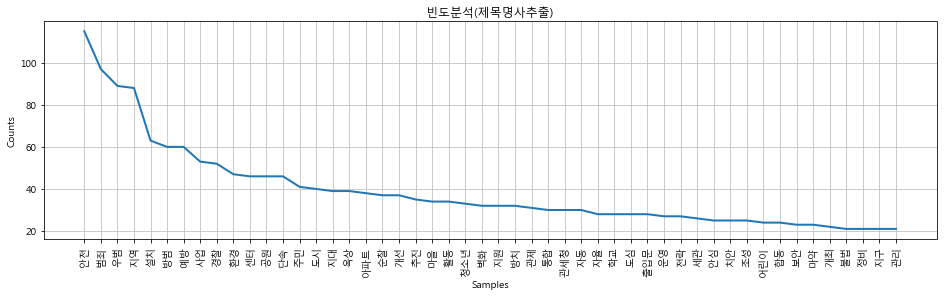

In [256]:
#명사형용사 빈도분석그래프
tokens = nouns
vocab = nltk.Text(nouns)
plt.figure(figsize=(16,4))
plt.title('빈도분석(제목명사추출)')
vocab.plot(50)

## -키워드로빈도분석

In [257]:
#시리즈가 한번에 리스트가됨
범죄.키워드.tolist()

['영광경찰,개인택시지부,업무협약,영광경찰서,서장,한창훈,영광군지부,개인택시,영광군,지부,범죄,피해자,보호,업무협약,그동안,피해자들,수사기관,심야,출석,국가,교통,편의,제공,협약,범죄,피해자,심야시간,경찰서,조사,귀가,택시,이용,귀가,서비스,제공,한창훈,서장,원년,피해자,보호,범죄,피해자,보호,지원,제도,장치,지속적,마련,최선',
 '독자투고,CPTED,범죄예방,과거,사회,건축,설계,도시계획,수립,단계,경제성,편의성,치안요소,범죄,취약,지역,발생,문제점,경찰,경찰력,투입,의존,순찰활동,범죄예방,방식,범죄,유발,물리적,환경개선,범죄,예방,환경설계,범죄예방,CPTED,추진,부연,CPTED,건축설계,도시계획,도시,환경,범죄,방어적,design,디자인,defensive,범죄,발생,기회,주민들,범죄,두려움,경감,안전감,유지,향상,종합적,범죄예방,전략,편의점,현금취급,심야시간,영업,방범시설,부족,범죄,발생,가능성,대표,장소,환경개선,범죄예방,경찰청,20,555개소,전국,편의점,개소,개선,범죄,취약,시설물,평가,방범,시설,우수,편의점,개소,인증마크,수여,편의점,방범,인증,지속,편의점,자위,방범,유도,범죄,발생,억제,경찰청,교육과정,CPTED,전문가,운영,연간,전문경찰관,양성,국토교통부,CPTED,제도화,건축법,개정,요구,건축물,범죄예방설계,제정,건축물,설계,초기,CPTED,적용,범죄자,사회,황인준',
 '기고,에코,Echo,도시,조성,걸음,발걸음,태자,정용욱,광주,서구,청소,행정,과장,미국,윌슨,범죄학자,제임스,조지,켈링,유리창,Broken,Windows,이론,유리창,방치,지점,중심,범죄,확산,이론,무질서,방치,가능성,의미,사회,범죄,공분,사회질서,규칙,무감각,경향,절도,방화,폭력,범죄,쓰레기,기초질서,상대적,기초질서,사회속,강제,사람,피해,약속,공동체,약속,것중,행위,쓰레기,불법,투기,쓰레기,불법,투기,해결,지방자치단체,불법,투기,감시카메라,설치,차량,블랙박스,동원,불법투기자,색출,제주도,골머리,쓰레기,해결,쓰레기,실시간,모니터링,방송,불법,투기,단속,감시카메라,설치,지

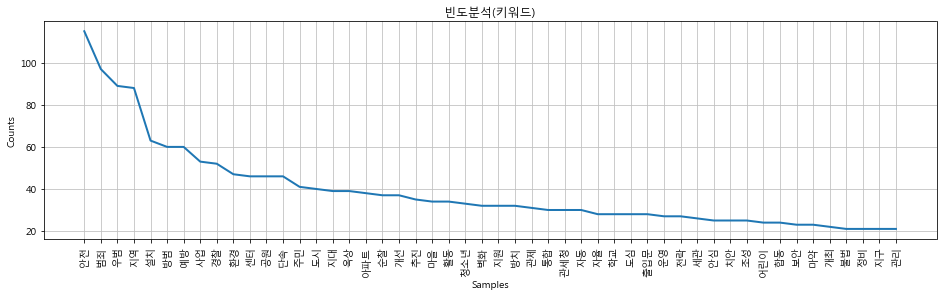

In [258]:
tokens = 범죄.키워드.tolist()
vocab = nltk.Text(nouns)
plt.figure(figsize=(16,4))
plt.title('빈도분석(키워드)')
vocab.plot(50)

## -특성추출열로빈도분석

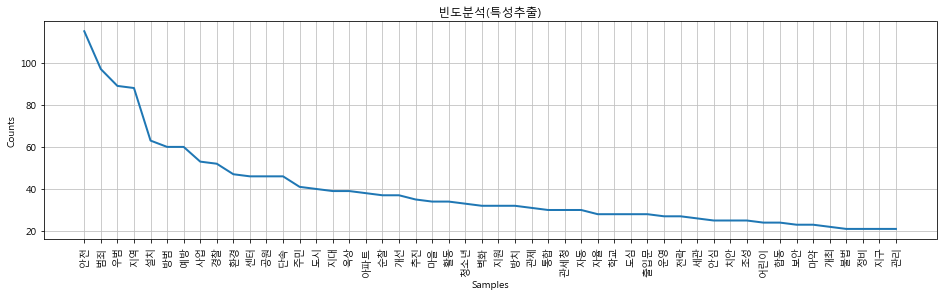

In [259]:
tokens = 범죄.특성추출.tolist()
vocab = nltk.Text(nouns)
plt.figure(figsize=(16,4))
plt.title('빈도분석(특성추출)')
vocab.plot(50)

# 필터링해서 빈도분석
사회문제가 미성년범죄인 카테고리에 한해서

In [288]:
# 사회>사회문제>미성년범죄
# for i in range(3):
#     row = '사건/사고 분류'+f'{i+1}'
indexlist=[]
for i in range(len(범죄뉴스)):
    if str(범죄뉴스['사건/사고 분류1'][i])[8:] == '미성년범죄':
        #print(str(범죄뉴스['사건/사고 분류1'][i])[8:])
        indexlist.append(i)
indexlist

[47,
 70,
 107,
 244,
 301,
 331,
 427,
 457,
 964,
 1137,
 1277,
 1317,
 1373,
 1402,
 1497,
 1514,
 1598,
 1624,
 1648,
 1665,
 1666,
 1798,
 1910,
 1934,
 2018,
 2036,
 2052,
 2667,
 2671,
 2949,
 2978,
 3177,
 3384,
 3393,
 3464,
 3478,
 3608,
 3868,
 3960,
 3982,
 4030,
 4031,
 4032,
 4033,
 4265,
 4629,
 4816,
 5065,
 5067,
 5472,
 5503,
 5564,
 5851,
 5870,
 6288,
 6293,
 6309,
 6319,
 6320,
 6341,
 6369,
 6525,
 6583,
 6623,
 6624,
 6838,
 6856,
 6908,
 7036,
 7131,
 7188,
 7199,
 7619,
 7620,
 7621,
 7939,
 8057,
 8102,
 8107,
 8129,
 8409,
 8410,
 8651,
 8660,
 8722,
 8727,
 8800,
 9046,
 9092,
 9276,
 9278,
 9324,
 9343,
 9485,
 9656,
 9693,
 9712,
 9881,
 9951,
 10096,
 10197,
 10511,
 10512,
 10663,
 10792,
 10840,
 10897,
 10930,
 11176,
 11257,
 11264,
 11426,
 11441,
 11442,
 11508,
 11580,
 11650,
 11757,
 11769,
 11828,
 12436,
 12539,
 13366,
 13644,
 13899,
 13971,
 14032,
 14301,
 14303,
 14353,
 14739,
 14740,
 14799,
 14840,
 15047,
 15149,
 15262,
 15563,
 15804

In [261]:
    사건사고분류리스트 = 사건사고분류리스트+list(set(df[row].dropna().values))
#공백을 지우고
for i in range(len(사건사고분류리스트)):
    사건사고분류리스트[i] = 사건사고분류리스트[i].strip()
#다시 중복집단제거
사건사고분류 = set(사건사고분류리스트)
사건사고분류

IndentationError: expected an indented block (<ipython-input-261-3f40d1e2a7d7>, line 4)